In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

In [3]:
dat_df_eo = pd.read_csv("dat_df_eo.csv", sep=',')
dat_df_eh = pd.read_csv("dat_df_eh.csv", sep=',')

In [4]:
dat_df_eo['soa'] = dat_df_eo['soa']*1000
dat_df_eh['soa'] = dat_df_eh['soa']*1000

In [5]:
dat_df_eo['soa'] = dat_df_eo['soa'].astype(int)
dat_df_eh['soa'] = dat_df_eh['soa'].astype(int)

In [6]:
## Don't consider high cue amplitude

dat_df_eo = dat_df_eo[(dat_df_eo['saccade_time_to_lum'] > 70) & (dat_df_eo['cue_amplitude'] == 'normal')]

### Fix SOA

In [7]:
dat_df_eo['soa'].unique()

array([100,  20,  50, 200, 300])

In [8]:
main_soas = [20, 50, 100, 200, 300]

dat_df_eh = dat_df_eh[dat_df_eh['soa'].isin(main_soas)]

In [9]:
dat_df_eh['soa'].unique()

array([100,  50, 200,  20, 300])

## Eye only grouped_by_soa_congr_df

In [44]:
## Group by SOA

grouped_by_soa_congr_df = dat_df_eo.groupby(['soa', 'cue_lum_congruency']).agg({
    'hit_from_eye': 'sum',
    'miss_from_eye': 'sum'
}).reset_index()

# Calculate total, hit rate, and miss rate
grouped_by_soa_congr_df['total'] = grouped_by_soa_congr_df['hit_from_eye'] + grouped_by_soa_congr_df['miss_from_eye']
grouped_by_soa_congr_df['hit_rate'] = grouped_by_soa_congr_df['hit_from_eye'] / grouped_by_soa_congr_df['total']
grouped_by_soa_congr_df['miss_rate'] = grouped_by_soa_congr_df['miss_from_eye'] / grouped_by_soa_congr_df['total']

# Remove SOAs with less than 50 trials
soa_filter = grouped_by_soa_congr_df.loc[grouped_by_soa_congr_df['total'] < 50, 'soa']
grouped_by_soa_congr_df = grouped_by_soa_congr_df[~grouped_by_soa_congr_df['soa'].isin(soa_filter)]

In [45]:
grouped_by_soa_congr_df

,soa,cue_lum_congruency,hit_from_eye,miss_from_eye,total,hit_rate,miss_rate
0,20,congruent,3598,611,4209,0.854835,0.145165
1,20,incongruent,3579,627,4206,0.850927,0.149073
2,50,congruent,520,92,612,0.849673,0.150327
3,50,incongruent,480,118,598,0.802676,0.197324
4,100,congruent,3552,927,4479,0.793034,0.206966
5,100,incongruent,3514,1001,4515,0.778295,0.221705
6,200,congruent,3038,1387,4425,0.686554,0.313446
7,200,incongruent,2882,1416,4298,0.670544,0.329456
8,300,congruent,4310,2010,6320,0.681962,0.318038
9,300,incongruent,4426,1999,6425,0.688872,0.311128


In [46]:
session_values = np.unique(dat_df_eo['filename'])
soa_values = np.unique(dat_df_eo['soa'])
final_df = pd.DataFrame({'soa': [], 'perf_congr': [], 'perf_incongr': [], 'RT_congr': [], 'RT_incongr':[], 'n_congr': [], 'n_incongr':[]})

for day in session_values:
    session = dat_df_eo[dat_df_eo['filename']==day]
    
    #filename_lst = []
    #soas_lst = []
    #congr_perf_lst = []
    #incongr_perf_lst = []
    #congr_n = []
    #incongr_n = []
    #congr_RT_lst = []
    #incongr_RT_lst = []
    for i in soa_values:

        filename_lst = []
        soas_lst = []
        congr_perf_lst = []
        incongr_perf_lst = []
        congr_n = []
        incongr_n = []
        congr_RT_lst = []
        incongr_RT_lst = []

        subset = session[session['soa'] == i]

        ## CONGRUENT
        corr_congr = subset[(subset['hit_from_eye'] == True) & (subset['cue_lum_congruency'] == "congruent")]
        incorr_congr = subset[(subset['hit_from_eye'] == False) & (subset['cue_lum_congruency'] == "congruent")]
        congr_n_trials = len(corr_congr) + len(incorr_congr)

        ## INCONGRUENT
        corr_incongr = subset[(subset['hit_from_eye'] == True) & (subset['cue_lum_congruency'] == "incongruent")]
        incorr_incongr = subset[(subset['hit_from_eye'] == False) & (subset['cue_lum_congruency'] == "incongruent")]
        incongr_n_trials = len(corr_incongr) + len(incorr_incongr)

        if congr_n_trials >= 1 and incongr_n_trials >= 1:
            soas_lst.append(i)
            congr_perf = len(corr_congr) / congr_n_trials
            #print(congr_n_trials)
            congr_n.append(congr_n_trials)
            congr_perf_lst.append(congr_perf)
            #print('Performance in congruent:', congr_perf, 'soa', i)
            congr_RT =  np.mean(corr_congr['saccade_time_to_lum'])
            congr_RT_lst.append(congr_RT)
            incongr_perf = len(corr_incongr) / incongr_n_trials
            incongr_n.append(incongr_n_trials)
            incongr_perf_lst.append(incongr_perf)
            #print('Performance in incongruent:', incongr_perf, 'soa', i)
            incongr_RT = np.mean(corr_incongr['saccade_time_to_lum'])
            incongr_RT_lst.append(incongr_RT)
            
        temp_df = pd.DataFrame({'soa': soas_lst, 'perf_congr': congr_perf_lst, 'perf_incongr': incongr_perf_lst, 
                'RT_congr': congr_RT_lst, 'RT_incongr': incongr_RT_lst, 'n_congr': congr_n, 'n_incongr':incongr_n})
        final_df = pd.concat([final_df,temp_df])

In [47]:
final_df

,soa,perf_congr,perf_incongr,RT_congr,RT_incongr,n_congr,n_incongr
0,20.0,0.875000,0.769231,435.547619,504.000000,24.0,13.0
0,50.0,0.842105,0.739130,466.437500,457.352941,19.0,23.0
0,100.0,0.809524,0.892857,372.852941,409.780000,21.0,28.0
0,20.0,0.909091,0.842105,528.650000,482.937500,11.0,19.0
0,50.0,0.928571,0.857143,439.192308,390.791667,14.0,14.0
...,...,...,...,...,...,...,...
0,300.0,0.764706,0.756757,459.038462,409.053571,34.0,37.0
0,300.0,0.763889,0.822581,423.890909,393.166667,72.0,62.0
0,300.0,0.678571,0.740741,446.736842,447.900000,28.0,27.0
0,300.0,0.616667,0.771429,416.081081,446.833333,60.0,70.0


In [48]:
final_df.groupby(['soa'])['n_congr'].sum()

soa
20.0     4209.0
50.0      612.0
100.0    4447.0
200.0    4404.0
300.0    6320.0
Name: n_congr, dtype: float64

In [49]:
final_df.groupby(['soa'])['n_incongr'].sum()

soa
20.0     4206.0
50.0      598.0
100.0    4515.0
200.0    4297.0
300.0    6425.0
Name: n_incongr, dtype: float64

In [51]:
final_df['n_congr'].sum() + final_df['n_incongr'].sum()

40033.0

In [50]:
stat, pvalue = wilcoxon(final_df['perf_congr'], final_df['perf_incongr'], alternative='greater')
print(pvalue)
convert_pvalue_to_asterisks(pvalue)

0.0284158204729791


'*'

In [25]:
from scipy.stats import wilcoxon

pvalues = []
x_values = np.unique(final_df['soa'])
for x in x_values:
    stat, pvalue = wilcoxon(final_df[final_df['soa'] == x]['perf_congr'], final_df[final_df['soa'] == x]['perf_incongr'], alternative='greater')
    print(x, pvalue, convert_pvalue_to_asterisks(pvalue))
    pvalues.append(convert_pvalue_to_asterisks(pvalue))

20.0 0.18291123927035396 ns
50.0 0.006575182117142334 **
100.0 0.1746703755642115 ns
200.0 0.01225396006169027 *
300.0 0.8592445436830811 ns


In [23]:
pvalues

['ns', '**', 'ns', '*', 'ns']

In [106]:
final_df = final_df.reset_index(drop=True)

In [108]:
final_df['soa'] = final_df['soa'].astype(int)

In [109]:
soa = []
perf = []
cat = []

for i in range(len(final_df)):
    soa.append(final_df['soa'][i])
    perf.append(final_df['perf_congr'][i]*100)
    cat.append('congruent')
    soa.append(final_df['soa'][i])
    perf.append(final_df['perf_incongr'][i]*100)
    cat.append('incongruent')

In [110]:
for_violin_perf = pd.DataFrame({'Stimulus Onset Asynchrony (ms)': soa, 'Performance (%)': perf, 'Condition':cat})
for_violin_perf.to_csv('eyeonly_performance.csv')

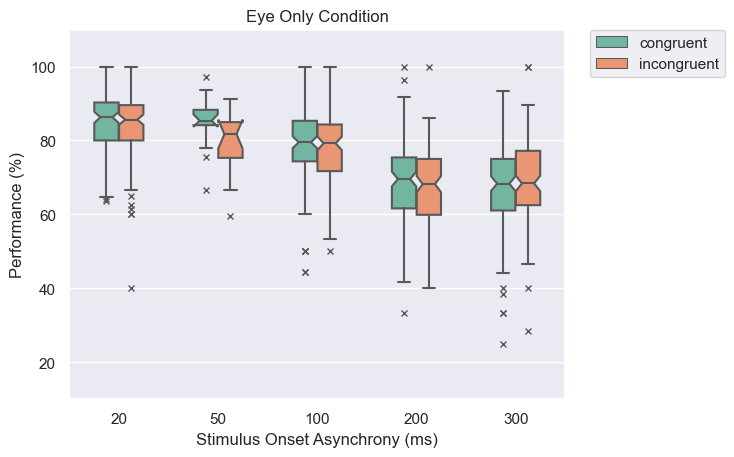

In [21]:
sns.set_theme(style='darkgrid')
sns.boxplot(data=for_violin_perf, x="Stimulus Onset Asynchrony (ms)", y="Performance (%)", notch=True, flierprops={"marker": "x"}, hue="Condition", palette='Set2', width=0.5).set(title='Eye Only Condition')
plt.ylim(10, 110)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### Eye&Head

In [52]:
## Group by SOA

grouped_by_soa_congr_df = dat_df_eh.groupby(['soa', 'cue_lum_congruency']).agg({
    'hit_from_eye': 'sum',
    'miss_from_eye': 'sum'
}).reset_index()

# Calculate total, hit rate, and miss rate
grouped_by_soa_congr_df['total'] = grouped_by_soa_congr_df['hit_from_eye'] + grouped_by_soa_congr_df['miss_from_eye']
grouped_by_soa_congr_df['hit_rate'] = grouped_by_soa_congr_df['hit_from_eye'] / grouped_by_soa_congr_df['total']
grouped_by_soa_congr_df['miss_rate'] = grouped_by_soa_congr_df['miss_from_eye'] / grouped_by_soa_congr_df['total']

# Remove SOAs with less than 50 trials
soa_filter = grouped_by_soa_congr_df.loc[grouped_by_soa_congr_df['total'] < 50, 'soa']
grouped_by_soa_congr_df = grouped_by_soa_congr_df[~grouped_by_soa_congr_df['soa'].isin(soa_filter)]

In [53]:
grouped_by_soa_congr_df

,soa,cue_lum_congruency,hit_from_eye,miss_from_eye,total,hit_rate,miss_rate
0,20,congruent,944,181,1125,0.839111,0.160889
1,20,incongruent,914,226,1140,0.801754,0.198246
2,50,congruent,1842,342,2184,0.843407,0.156593
3,50,incongruent,2159,577,2736,0.789108,0.210892
4,100,congruent,1492,343,1835,0.813079,0.186921
5,100,incongruent,1825,632,2457,0.742776,0.257224
6,200,congruent,326,110,436,0.747706,0.252294
7,200,incongruent,307,162,469,0.654584,0.345416
8,300,congruent,707,382,1089,0.649219,0.350781
9,300,incongruent,1036,615,1651,0.627498,0.372502


In [54]:
session_values = np.unique(dat_df_eh['filename'])
soa_values = np.unique(dat_df_eh['soa'])
final_df = pd.DataFrame({'soa': [], 'perf_congr': [], 'perf_incongr': [], 'RT_congr': [], 'RT_incongr':[], 'n_congr': [], 'n_incongr':[]})

for day in session_values:
    session = dat_df_eh[dat_df_eh['filename']==day]
    
    #filename_lst = []
    #soas_lst = []
    #congr_perf_lst = []
    #incongr_perf_lst = []
    #congr_n = []
    #incongr_n = []
    #congr_RT_lst = []
    #incongr_RT_lst = []
    for i in soa_values:

        filename_lst = []
        soas_lst = []
        congr_perf_lst = []
        incongr_perf_lst = []
        congr_n = []
        incongr_n = []
        congr_RT_lst = []
        incongr_RT_lst = []

        subset = session[session['soa'] == i]

        ## CONGRUENT
        corr_congr = subset[(subset['hit_from_eye'] == True) & (subset['cue_lum_congruency'] == "congruent")]
        incorr_congr = subset[(subset['hit_from_eye'] == False) & (subset['cue_lum_congruency'] == "congruent")]
        congr_n_trials = len(corr_congr) + len(incorr_congr)

        ## INCONGRUENT
        corr_incongr = subset[(subset['hit_from_eye'] == True) & (subset['cue_lum_congruency'] == "incongruent")]
        incorr_incongr = subset[(subset['hit_from_eye'] == False) & (subset['cue_lum_congruency'] == "incongruent")]
        incongr_n_trials = len(corr_incongr) + len(incorr_incongr)

        if congr_n_trials >= 1 and incongr_n_trials >= 1:
            soas_lst.append(i)
            congr_perf = len(corr_congr) / congr_n_trials
            #print(congr_n_trials)
            congr_n.append(congr_n_trials)
            congr_perf_lst.append(congr_perf)
            #print('Performance in congruent:', congr_perf, 'soa', i)
            congr_RT =  np.mean(corr_congr['saccade_time_to_lum'])
            congr_RT_lst.append(congr_RT)
            incongr_perf = len(corr_incongr) / incongr_n_trials
            incongr_n.append(incongr_n_trials)
            incongr_perf_lst.append(incongr_perf)
            #print('Performance in incongruent:', incongr_perf, 'soa', i)
            incongr_RT = np.mean(corr_incongr['saccade_time_to_lum'])
            incongr_RT_lst.append(incongr_RT)
            
        temp_df = pd.DataFrame({'soa': soas_lst, 'perf_congr': congr_perf_lst, 'perf_incongr': incongr_perf_lst, 
                'RT_congr': congr_RT_lst, 'RT_incongr': incongr_RT_lst, 'n_congr': congr_n, 'n_incongr':incongr_n})
        final_df = pd.concat([final_df,temp_df])

In [55]:
final_df

,soa,perf_congr,perf_incongr,RT_congr,RT_incongr,n_congr,n_incongr
0,20.0,1.000000,1.000000,874.500000,1036.500000,1.0,1.0
0,100.0,1.000000,0.666667,1033.000000,867.250000,4.0,3.0
0,200.0,1.000000,0.600000,1107.500000,988.833333,1.0,5.0
0,100.0,0.750000,1.000000,1330.166667,2578.000000,4.0,1.0
0,300.0,1.000000,1.000000,651.000000,1044.500000,2.0,1.0
...,...,...,...,...,...,...,...
0,50.0,0.888889,0.750000,410.979167,389.527778,27.0,24.0
0,100.0,0.903226,0.628571,382.357143,355.045455,31.0,35.0
0,20.0,0.857143,0.767442,485.152778,558.227273,42.0,43.0
0,50.0,0.863636,0.772727,460.013158,504.558824,44.0,44.0


In [56]:
final_df['soa'] = final_df['soa'].astype(int)

In [57]:
final_df.groupby(['soa'])['n_congr'].sum()

soa
20     1123.0
50     2183.0
100    1831.0
200     434.0
300    1089.0
Name: n_congr, dtype: float64

In [58]:
final_df.groupby(['soa'])['n_incongr'].sum()

soa
20     1138.0
50     2187.0
100    1868.0
200     439.0
300    1070.0
Name: n_incongr, dtype: float64

In [61]:
stat, pvalue = wilcoxon(final_df['perf_congr'], final_df['perf_incongr'], alternative='greater')
print(pvalue)
convert_pvalue_to_asterisks(pvalue)

8.985430301203759e-07


'****'

In [42]:
final_df['n_congr'].sum() + final_df['n_incongr'].sum()

13362.0

In [34]:
from scipy.stats import wilcoxon

pvalues = []
x_values = np.unique(final_df['soa'])
for x in x_values:
    stat, pvalue = wilcoxon(final_df[final_df['soa'] == x]['perf_congr'], final_df[final_df['soa'] == x]['perf_incongr'], alternative='greater')
    print(x, pvalue, convert_pvalue_to_asterisks(pvalue))
    pvalues.append(convert_pvalue_to_asterisks(pvalue))

20 0.03903241056858889 *
50 0.02736752007163841 *
100 0.0008510028708695411 ***
200 0.0078125 **
300 0.017739974247762108 *


In [120]:
final_df = final_df.reset_index(drop=True)

In [121]:
soa = []
perf = []
cat = []

for i in range(len(final_df)):
    soa.append(final_df['soa'][i])
    perf.append(final_df['perf_congr'][i]*100)
    cat.append('congruent')
    soa.append(final_df['soa'][i])
    perf.append(final_df['perf_incongr'][i]*100)
    cat.append('incongruent')

In [122]:
for_violin_perf = pd.DataFrame({'Stimulus Onset Asynchrony (ms)': soa, 'Performance (%)': perf, 'Condition':cat})
for_violin_perf.to_csv('eyehead_performance.csv')

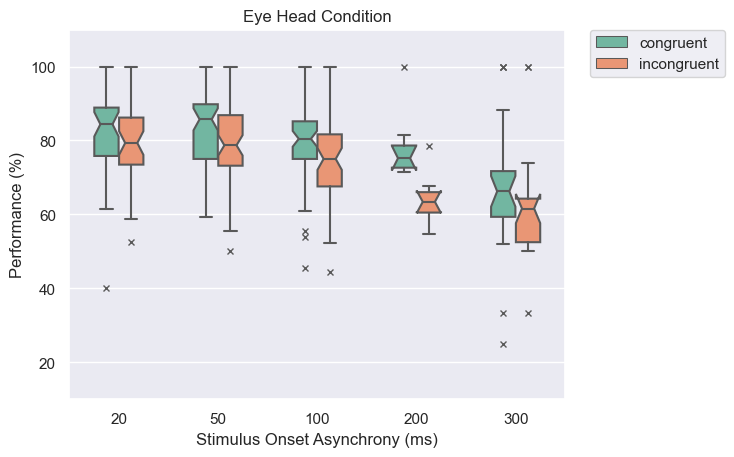

In [68]:
sns.set_theme(style='darkgrid')
sns.boxplot(data=for_violin_perf, x="Stimulus Onset Asynchrony (ms)", y="Performance (%)", notch=True, flierprops={"marker": "x"}, hue="Condition", palette='Set2', width=0.5).set(title='Eye Head Condition')
plt.ylim(10, 110)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)